In [30]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 153 ##
Gold: O=C(O)C1(O)[C@H]2CCC[C@H]21
Pred: C1C[C@@H]2[C@@H](C1)C2(C(=O)O)O
Post: O=C(O)[C@]1(O)[C@H]2CCC[C@H]21
(282, 441, 3)


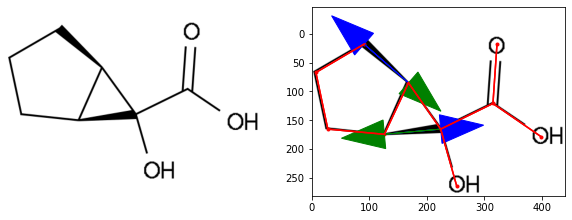

## 1026 ##
Gold: Cl[Rh+2].[CH2][CH][CH]C[CH2-]
Pred: [CH2-]C[CH][CH]C.Cl[Pt+2]
Post: Cl[Pt+2].[CH2-]C[CH][CH]C
(158, 758, 3)


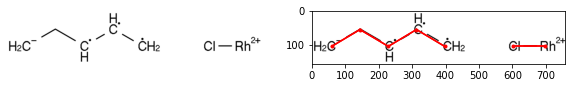

## 1469 ##
Gold: [Au+].[C-]#N
Pred: [C-]#N.[Ag+]
Post: [Ag+].[C-]#N
(47, 361, 3)


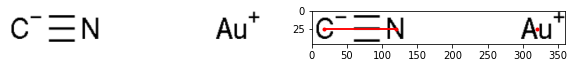

## 2220 ##
Gold: [F-].[F-].[F-].[F-].[F-].[F-].[Pb+2].[Si+4]
Pred: [F-].[F-].[F-].[F-].[F-].[F-].[Sr+2].[Fe+3]
Post: [F-].[F-].[F-].[F-].[F-].[F-].[Fe+3].[Sr+2]
(254, 252, 3)


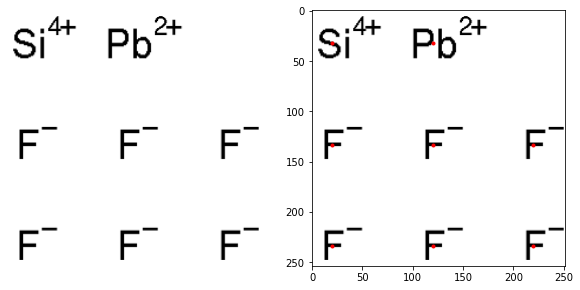

## 2669 ##
Gold: [224Ra]
Pred: <unk>
Post: C
(54, 101, 3)


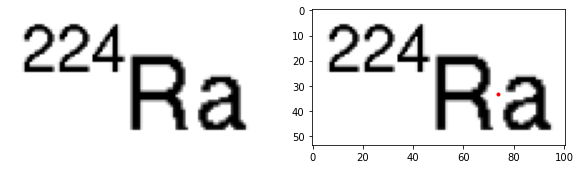

## 4008 ##
Gold: [15O]=[15O]
Pred: <unk>=<unk>
Post: C=C
(54, 168, 3)


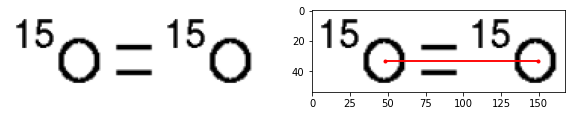

## 4442 ##
Gold: I[Th](I)(I)I
Pred: I[Pt](I)(I)I
Post: I[Pt](I)(I)I
(216, 190, 3)


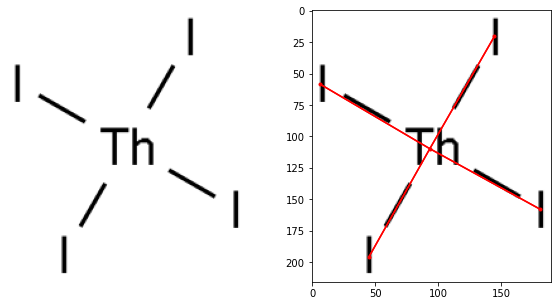

## 6379 ##
Gold: C[Sb+](C)(C)CCO
Pred: C[Sn](C)(C)CCO
Post: C[Sn](C)(C)CCO
(174, 394, 3)


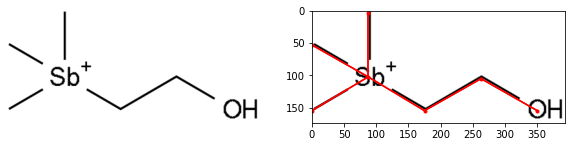

## 6708 ##
Gold: C=S(C)(=O)c1ccccc1
Pred: CS(=O)(=O)C1=CC=CC=C1
Post: CS(=O)(=O)c1ccccc1
(204, 424, 3)


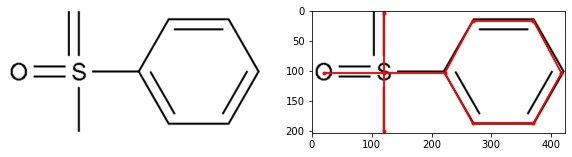

## 6720 ##
Gold: O.O.O.[Sr].[Ti]
Pred: O.O.O.[Ti].[Si]
Post: O.O.O.[Si].[Ti]
(144, 280, 3)


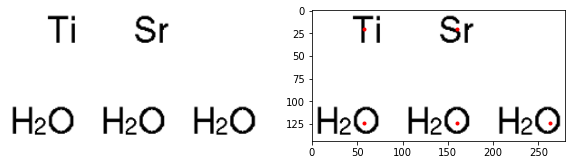

## 7327 ##
Gold: C1#C[AlH]1.[AlH]
Pred: C1#CN1.[Ni]
Post: C1#CN1.[Ni]
(161, 350, 3)


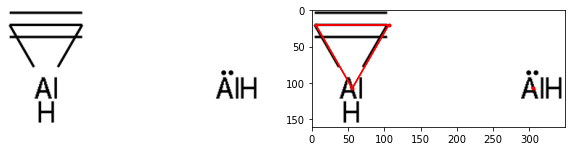

## 7754 ##
Gold: [Ca]=[Fe]
Pred: [Ge]=[Te]
Post: [Ge]=[Te]
(43, 156, 3)


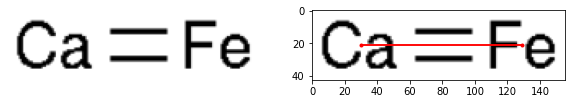

## 8720 ##
Gold: O=[14C](O)[14C@H]1CC=CCC1
Pred: C1C[14CH](CC=C1)[14C](=O)O
Post: O=[14C](O)[14CH]1CC=CCC1
(216, 399, 3)


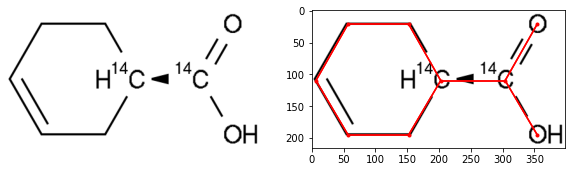

## 9716 ##
Gold: [BH3-]
Pred: [Ag+]
Post: [Ag+]
(49, 90, 3)


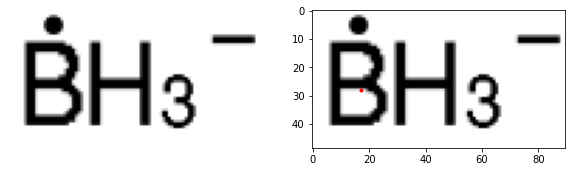

## 10440 ##
Gold: [Mg]=[Fe]
Pred: [Mo]=[Fe]
Post: [Fe]=[Mo]
(51, 157, 3)


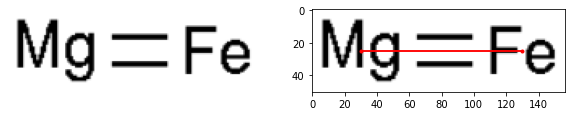

## 11701 ##
Gold: Cl[Au](Cl)Cl.c1ccncc1
Pred: C1=CC=NC=C1.Cl[Mn](Cl)Cl
Post: Cl[Mn](Cl)Cl.c1ccncc1
(198, 600, 3)


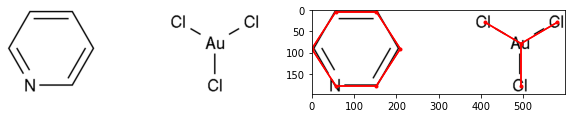

## 12544 ##
Gold: [250Es]
Pred: <unk>
Post: C
(54, 97, 3)


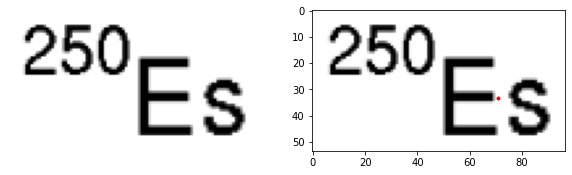

## 13429 ##
Gold: C[C]1[CH][CH][C@H](C(C)C)CC1
Pred: C[C]1CC[C@H]([CH][CH]1)C(C)C
Post: C[C]1[CH][CH]C(C(C)C)CC1
(231, 456, 3)


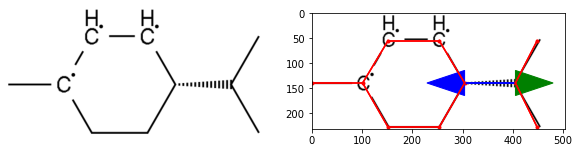

## 14083 ##
Gold: [O-][Si](O)(O)O.[Zr]
Pred: O[Si](O)(O)[O-].[Ti]
Post: [O-][Si](O)(O)O.[Ti]
(216, 441, 3)


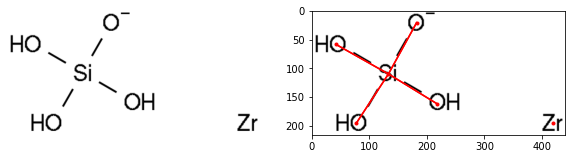

## 15346 ##
Gold: [Al].[As].[In]
Pred: [Al].[As].[Pt]
Post: [Al].[As].[Pt]
(143, 150, 3)


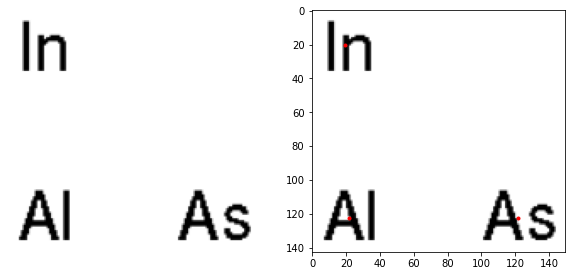

In [34]:
import random
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bms.dataset import generate_indigo_image
from bms.tokenizer import NodeTokenizer
from bms.chemistry import canonicalize_smiles, convert_smiles_to_inchi, _postprocess_smiles

from indigo import Indigo
from indigo.renderer import IndigoRenderer
import rdkit.Chem as Chem

df = pd.read_csv('../data/molbank/pubchem/test.csv')
pred_df = pd.read_csv('../output/pubchem/synthetic/swin_base_200k_joint_large/prediction_test.csv')

count = 0

for i, row in df.iterrows():
    if count == 20:
        break
    assert row['image_id'] == pred_df.loc[i, 'image_id']
    smiles = row['SMILES']
    gold_smiles,_ = canonicalize_smiles(row['SMILES'], ignore_cistrans=True)
    pred_smiles = pred_df.loc[i, 'SMILES']
    post_smiles,_ = canonicalize_smiles(pred_df.loc[i,'post_SMILES'], ignore_cistrans=True)
    if gold_smiles == post_smiles or row['num_atoms'] > 10:
        continue
    count += 1
    print(f'## {i} ##')
#     print('Orig:', smiles)
    print('Gold:', gold_smiles)
    print('Pred:', pred_smiles)
    print('Post:', post_smiles)
    path = '../' + row['file_path']
    img = cv2.imread(path)
    print(img.shape)
    h, w, _ = img.shape
#     nodes = get_nodes(smiles)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')
#     plt.scatter(nodes[:,0], nodes[:,1])
    plt.subplot(1,2,2)
    plt.imshow(img)
    coords = np.array(eval(pred_df.loc[i, 'node_coords']))
    symbols = np.array(eval(pred_df.loc[i, 'node_symbols']))
    x, y = coords[:,0]*w, coords[:,1]*h
    plt.scatter(x, y, color='r', marker='.')
    edges = eval(pred_df.loc[i, 'edges'])
    post_smiles, *_ = _postprocess_smiles(pred_smiles, coords, symbols, edges, debug=True)
    for i in range(len(x)):
        for j in range(len(x)):
            if edges[i][j] != 0:
                if edges[i][j] in [5, 6]:
                    color = 'blue' if edges[i][j] == 5 else 'green'
                    plt.arrow(x[i], y[i], x[j]-x[i], y[j]-y[i], color=color, head_width=50)
#                     print(i, j, edges[i][j], edges[j][i])
                else:
                    color = 'red'
                    plt.plot([x[i], x[j]], [y[i], y[j]], color)
    plt.show()

Gold: O=C(C=Cc1cccc(Cl)c1Cl)c1ccc2c(c1)-c1ccccc1C2
Pred: C1C2=C(C=C(C=C2)C(=O)/C=C/C3=C(C(=CC=C3)Cl)Cl)C4=CC=CC=C41
Post: O=C(C=Cc1cccc(Cl)c1Cl)c1ccc2c(c1)-c1ccccc1C2


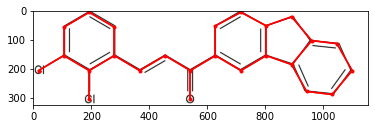

[]
graph: O=C(/C=C/c1cccc(Cl)c1Cl)c1ccc2c(c1)-c1ccccc1C2
[[0.81, 0.063], [0.73, 0.159], [0.73, 0.476], [0.651, 0.635], [0.571, 0.476], [0.571, 0.159], [0.651, 0.016], [0.492, 0.635], [0.492, 0.937], [0.413, 0.476], [0.333, 0.635], [0.254, 0.476], [0.175, 0.635], [0.095, 0.476], [0.095, 0.175], [0.175, 0.016], [0.254, 0.175], [0.016, 0.635], [0.175, 0.937], [0.81, 0.571], [0.857, 0.857], [0.937, 0.889], [1.0, 0.635], [0.952, 0.349], [0.873, 0.317]]
['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'O', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Cl', 'Cl', 'C', 'C', 'C', 'C', 'C', 'C']
[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 

In [29]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300,300
from bms.chemistry import _verify_chirality, _postprocess_smiles, _convert_graph_to_smiles

i = 1
gold_smiles = df.loc[i, 'SMILES']
path = '../' + df.loc[i, 'file_path']
img = cv2.imread(path)

pred_row = pred_df.loc[i]
pred_smiles = pred_row['SMILES']
post_smiles = pred_row['post_SMILES']

gold_smiles,_ = canonicalize_smiles(gold_smiles)

print('Gold:', gold_smiles)
print('Pred:', pred_smiles)
print('Post:', post_smiles)

coords = eval(pred_row['node_coords'])
symbols = eval(pred_row['node_symbols'])
edges = eval(pred_row['edges'])

plt.imshow(img)
h,w,_ = img.shape
x, y = np.array(coords)[:,0]*w, np.array(coords)[:,1]*h
plt.scatter(x, y, color='r', marker='.')
for i in range(len(x)):
    for j in range(len(x)):
        if edges[i][j] != 0:
            if edges[i][j] in [5, 6]:
                color = 'blue' if edges[i][j] == 5 else 'green'
                plt.arrow(x[i], y[i], x[j]-x[i], y[j]-y[i], color=color, head_width=50)
                print(i,j,edges[i][j])
            else:
                color = 'red'
                plt.plot([x[i], x[j]], [y[i], y[j]], color)
plt.show()

mol_gold = Chem.MolFromSmiles(gold_smiles)
mol_pred = Chem.MolFromSmiles(pred_smiles)
mol_post = Chem.MolFromSmiles(post_smiles)
img = Chem.Draw.MolsToGridImage([mol_gold,mol_pred,mol_post], subImgSize=(250,250), molsPerRow=3, useSVG=True)
# display(img)
chiral_centers = Chem.FindMolChiralCenters(mol_pred, includeUnassigned=True, includeCIP=False, useLegacyImplementation=False)
print(chiral_centers)
mol = Chem.RWMol(Chem.MolFromSmiles(pred_smiles))
smiles, molblock, mol = _convert_graph_to_smiles(coords, symbols, edges, debug=True)
# smiles, _ = _postprocess_smiles(pred_smiles, coords, symbols, edges, debug=True)
# smiles = Chem.MolToSmiles(mol, isomericSmiles=True, canonical=True)
print('graph:', smiles)
# print(molblock)

print(coords)
print(symbols)
print(edges)

# for atom in mol.GetAtoms():
#     print(atom.GetChiralTag())
# for bond in mol.GetBonds():
#     print(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), bond.GetStereo())

In [ ]:
df = pd.read_csv('../data/molbank/indigo-data/valid.csv')
nodes_pred_df = pd.read_csv('../output/indigo/swin_base_edges_bin64_ep100/prediction_valid.csv')
grid_pred_df = pd.read_csv('../output/indigo/swin_base_grid_ep100/prediction_valid.csv')

def get_num_atoms(smiles):
    indigo = Indigo()
    mol = indigo.loadMolecule(smiles)
    return mol.countAtoms()

num_atoms = [get_num_atoms(smiles) for smiles in df['SMILES']]
df['num_atoms'] = num_atoms

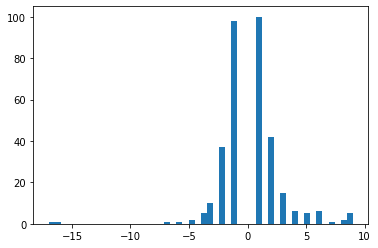

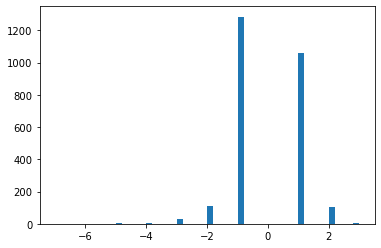

In [19]:
def plot_df(pred_df, num_atoms):
    pred_num_atoms = [len(eval(s)) for s in pred_df['node_symbols']]
    diff = np.array(pred_num_atoms) - np.array(num_atoms)
    diff = [d for d in diff if d != 0]
    plt.hist(diff, bins=50)
    plt.show()
    
plot_df(nodes_pred_df, num_atoms)
plot_df(grid_pred_df, num_atoms)

In [ ]:
from tqdm import tqdm
from bms.dataset import generate_indigo_image

df = pd.read_csv('../data/molbank/pubchem/train_200k.csv')
tokenizer = NodeTokenizer(64, '../bms/vocab.json', True)

n_fail = 0

for i, row in tqdm(df.iterrows()):
    smiles = row['SMILES']
    img, smiles, graph, success = generate_indigo_image(smiles, mol_augment=False)
    if not success:
        n_fail += 1
        print('FAIL:', n_fail)
        continue
    labels = tokenizer.smiles_coords_to_sequence(smiles, graph['coords'])

0.027054769467791062


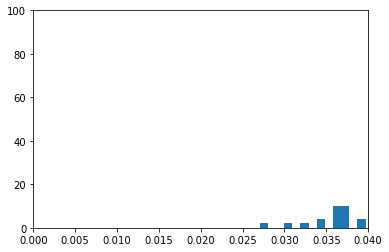

In [36]:
print(min(dists))
plt.hist(dists, 1000)
plt.xlim(0,0.04)
plt.ylim(0, 100)
plt.show()

In [104]:
import rdkit.Chem as Chem

mol = Chem.RWMol()
s = mol.AddAtom(Chem.Atom('C'))
t = mol.AddAtom(Chem.Atom('[Si]'))
mol.AddBond(s, t, Chem.BondType.SINGLE)
print(Chem.MolToSmiles(mol.GetMol()))
print(s,t)
mol

RuntimeError: Post-condition Violation
	Element '[Si]' not found
	Violation occurred on line 91 in file Code/GraphMol/PeriodicTable.h
	Failed Expression: anum > -1
	RDKIT: 2021.03.2
	BOOST: 1_73
